In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import scipy.stats as st
import sklearn.linear_model as lm
from sklearn import linear_model,metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as optim
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

plt.style.use('seaborn')

In [2]:
df = pd.read_csv("positive sightings.csv")

In [3]:
from math import sin, asin, cos, radians, fabs, sqrt
 
EARTH_RADIUS=6371           # Average radius of Earth，6371km
 
def hav(theta):
    s = sin(theta / 2)
    return s * s
 
def get_distance_hav(lat0, lng0, lat1, lng1):
    "Calculate the distance between two spots on a sphere using the haversine formula"
    # transform the coordinates into radians
    lat0 = radians(lat0)
    lat1 = radians(lat1)
    lng0 = radians(lng0)
    lng1 = radians(lng1)
 
    dlng = fabs(lng0 - lng1)
    dlat = fabs(lat0 - lat1)
    h = hav(dlat) + cos(lat0) * cos(lat1) * hav(dlng)
    distance = 2 * EARTH_RADIUS * asin(sqrt(h))
 
    return distance

48.9831,-122.5776
48.8782,-122.6849

49.0034125,-122.749578
48.931112,-122.5737657
get_distance_hav(48.9831,-122.5776,48.8782,-122.6849)
# get_distance_hav(49.0034125,-122.749578,48.931112,-122.5737657)

14.053419712294222

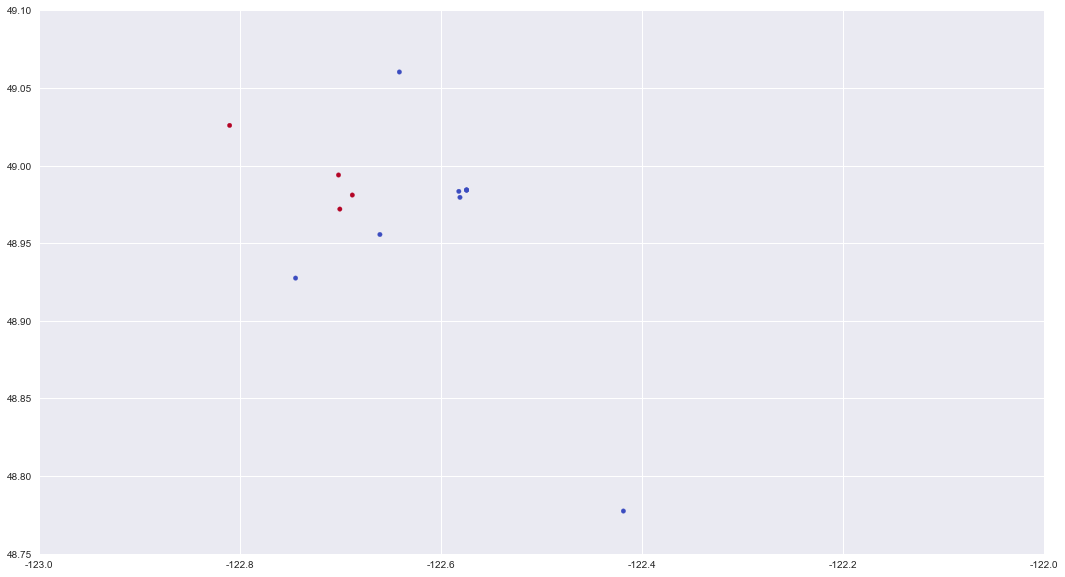

In [4]:
X=[[-122.702242,48.993892],[-122.700941,48.971949],[-122.810653,49.025831],[-122.688503,48.980994],
[-122.641648,49.060215],[-122.661037,48.955587],[-122.418612,48.777534],[-122.745016,48.927519],[-122.574809,48.984269],[-122.574726,48.984220],[-122.574720,48.984172],[-122.581335,48.979497],[-122.582465,48.983375]]
Y=[1,1,1,1,0,0,0,0,0,0,0,0,0]
X=np.array(X)
Y=np.array(Y)
fig, ax = plt.subplots(1, 1, figsize=(18, 10))
ax.set_xlim(-123,-122)
ax.set_ylim(48.75,49.1)
ax.scatter(X[:, 0], X[:, 1],c=Y,s=20,cmap='coolwarm')

In [5]:
def plot_svc_decision_function(clf, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function([[xi, yj]])
    # plot the margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.1, random_state=0)

In [7]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [10,1e-1, 1e-4],
                     'C': [1e-4,1e-3,1e-2,1e-1,1, 10, 100, 1000]}]
scores = ['precision', 'recall']

In [8]:
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

     # 调用 GridSearchCV，将 SVC(), tuned_parameters, cv=5, 还有 scoring 传递进去，
    clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    # 用训练集训练这个学习器 clf
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()

    # 再调用 clf.best_params_ 就能直接得到最好的参数搭配结果
    print(clf.best_params_)

    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']

    # 看一下具体的参数间不同数值的组合后得到的分数是多少
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))

    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)

    # 打印在测试集上的预测结果与真实值的分数
    print(classification_report(y_true, y_pred))

    print()

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 100, 'gamma': 10, 'kernel': 'rbf'}

Grid scores on development set:

0.417 (+/-0.587) for {'C': 0.0001, 'gamma': 10, 'kernel': 'rbf'}
0.417 (+/-0.587) for {'C': 0.0001, 'gamma': 0.1, 'kernel': 'rbf'}
0.417 (+/-0.587) for {'C': 0.0001, 'gamma': 0.0001, 'kernel': 'rbf'}
0.417 (+/-0.587) for {'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}
0.417 (+/-0.587) for {'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}
0.417 (+/-0.587) for {'C': 0.001, 'gamma': 0.0001, 'kernel': 'rbf'}
0.417 (+/-0.587) for {'C': 0.01, 'gamma': 10, 'kernel': 'rbf'}
0.417 (+/-0.587) for {'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}
0.417 (+/-0.587) for {'C': 0.01, 'gamma': 0.0001, 'kernel': 'rbf'}
0.417 (+/-0.587) for {'C': 0.1, 'gamma': 10, 'kernel': 'rbf'}
0.417 (+/-0.587) for {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
0.417 (+/-0.587) for {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.317 (+/-0.194) for {'C': 1, 'gamma': 10, 'kernel': 'r

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divi

Best parameters set found on development set:

{'C': 100, 'gamma': 10, 'kernel': 'rbf'}

Grid scores on development set:

0.600 (+/-0.400) for {'C': 0.0001, 'gamma': 10, 'kernel': 'rbf'}
0.600 (+/-0.400) for {'C': 0.0001, 'gamma': 0.1, 'kernel': 'rbf'}
0.600 (+/-0.400) for {'C': 0.0001, 'gamma': 0.0001, 'kernel': 'rbf'}
0.600 (+/-0.400) for {'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}
0.600 (+/-0.400) for {'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}
0.600 (+/-0.400) for {'C': 0.001, 'gamma': 0.0001, 'kernel': 'rbf'}
0.600 (+/-0.400) for {'C': 0.01, 'gamma': 10, 'kernel': 'rbf'}
0.600 (+/-0.400) for {'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}
0.600 (+/-0.400) for {'C': 0.01, 'gamma': 0.0001, 'kernel': 'rbf'}
0.600 (+/-0.400) for {'C': 0.1, 'gamma': 10, 'kernel': 'rbf'}
0.600 (+/-0.400) for {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
0.600 (+/-0.400) for {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.450 (+/-0.200) for {'C': 1, 'gamma': 10, 'kernel': 'rbf'}
0.600 (+/-0.400) for {'C': 1, 'gamma

D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with 

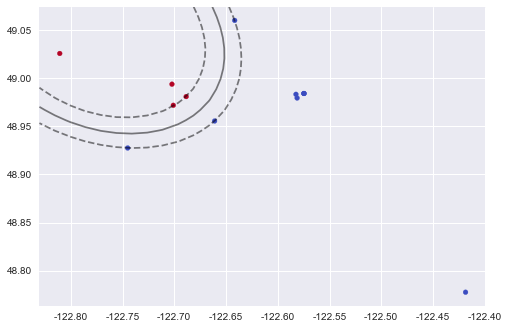

In [9]:
clf = SVC(C=1000,kernel='rbf',gamma=10).fit(X, Y)
plt.scatter(X[:, 0], X[:, 1], c=Y,s=23, cmap='coolwarm')
plot_svc_decision_function(clf)
fig=plt.gcf()
fig.savefig('./666.jpg')

In [10]:
def float_range(start, stop, step):
    ''' 支持 float 的步进函数

        输入 Input:
            start (float)  : 计数从 start 开始。默认是从 0 开始。
            end   (float)  : 计数到 stop 结束，但不包括 stop。
            step (float)  : 步长，默认为 1，如为浮点数，参照 steps 小数位数。

        输出 Output:
            浮点数列表

        例子 Example:
            >>> print(float_range(3.612, 5.78, 0.22))
            [3.612, 3.8320000000000003, 4.0520000000000005, 4.272, 4.492, 4.712, 4.932, 5.152, 5.372]
    '''

    return [start+i*step for i in range(int((stop-start)//step))]

[(0.1, 0.1, 0.6904761904761905), (0.1, 0.3, 0.6904761904761905), (0.1, 0.5, 0.6904761904761905), (0.1, 0.7, 0.6904761904761905), (0.1, 0.9, 0.6904761904761905), (0.1, 1.1, 0.6904761904761905), (0.1, 1.3, 0.6190476190476191), (0.1, 1.5, 0.6190476190476191), (0.1, 1.7, 0.7619047619047619), (0.1, 1.9, 0.7619047619047619), (0.1, 2.1, 0.7619047619047619), (0.1, 2.3, 0.7619047619047619), (0.1, 2.5, 0.7619047619047619), (0.1, 2.7, 0.7619047619047619), (0.1, 2.9, 0.7619047619047619), (0.1, 3.1, 0.7619047619047619), (0.1, 3.3, 0.7619047619047619), (0.1, 3.5, 0.7619047619047619), (0.1, 3.7, 0.7619047619047619), (0.1, 3.9, 0.7619047619047619), (0.1, 4.1, 0.7619047619047619), (0.1, 4.3, 0.7619047619047619), (0.1, 4.5, 0.7619047619047619), (0.1, 4.7, 0.7619047619047619), (0.1, 4.9, 0.7619047619047619), (0.1, 5.1, 0.7619047619047619), (0.1, 5.3, 0.6904761904761905), (0.1, 5.5, 0.6190476190476191), (0.1, 5.7, 0.6190476190476191), (0.1, 5.9, 0.6190476190476191), (0.1, 6.1, 0.6190476190476191), (0.1, 6

C:\Users\air10\AppData\Local\Temp/ipykernel_8508/1900415502.py:54: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


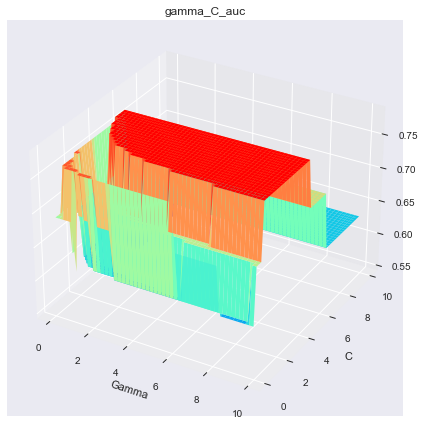

In [11]:
from sklearn.svm import SVC
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import  cross_val_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import GridSearchCV
 
 
# #define converts(字典)
# def Iris_label(s):
#     it={b'Iris-setosa':0, b'Iris-versicolor':1, b'Iris-virginica':2 }
#     return it[s]
 
# #1.读取数据集
# path='E:\PYTHON\machine_learning/Iris.data'
# data=np.loadtxt(path, dtype=float, delimiter=',', converters={4:Iris_label} )
# #converters={4:Iris_label}中“4”指的是第5列：将第5列的str转化为label(number)
 
# #2.划分数据与标签
# x,y=np.split(data,indices_or_sections=(4,),axis=1) #x为数据，y为标签,axis是分割的方向，1表示横向，0表示纵向，默认为0
# x=x[:,0:2] #为便于后边画图显示，只选取前两维度。若不用画图，可选取前四列x[:,0:4]
 
# # x = preprocessing.scale(x)#预处理数据样本
 
a=[]
x = []
y = []
Z = []
M = []#定义列表，分别用于接受不同组合的C，gamma以及性能指标值
for C in range(1,101,2):
    for gamma in range(1,101,2):
        #获得不同组合下的识别率，作为模型优劣评价的性能指标，这里需要注意的是，性能指标roc_auc，在本例中行不通，因为是多类问题，需要另外设置
        #获得的识别率是交叉验证后的平均值
        accuracy = cross_val_score(SVC(C=C,kernel='rbf',gamma=gamma),X,Y.ravel(),cv=2,scoring='accuracy').mean()
        x.append(C/10)
        y.append(gamma/10)
        Z.append(accuracy)
        M.append((C/10, gamma/10, accuracy))
        a.append(accuracy)
print(M)
#  Mean accuracy by cross validation of different combinations of parameters
#5、以C，gamma，auc作为三个坐标变量绘图
 
#将列表转换成数组
x = np.array(x).reshape(50,50)
y = np.array(y).reshape(50,50)
Z = np.array(Z).reshape(50,50)
a=np.array(a)
 
#绘制三维图形
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(x,y,Z,rstride=1,cstride=1,cmap=plt.get_cmap('rainbow'))
# ax.scatter(Y,X,Z,c='r')
plt.xlabel('Gamma')
plt.ylabel('C')
plt.title('gamma_C_auc')
plt.show()

In [12]:
print(max(a))

0.7857142857142857


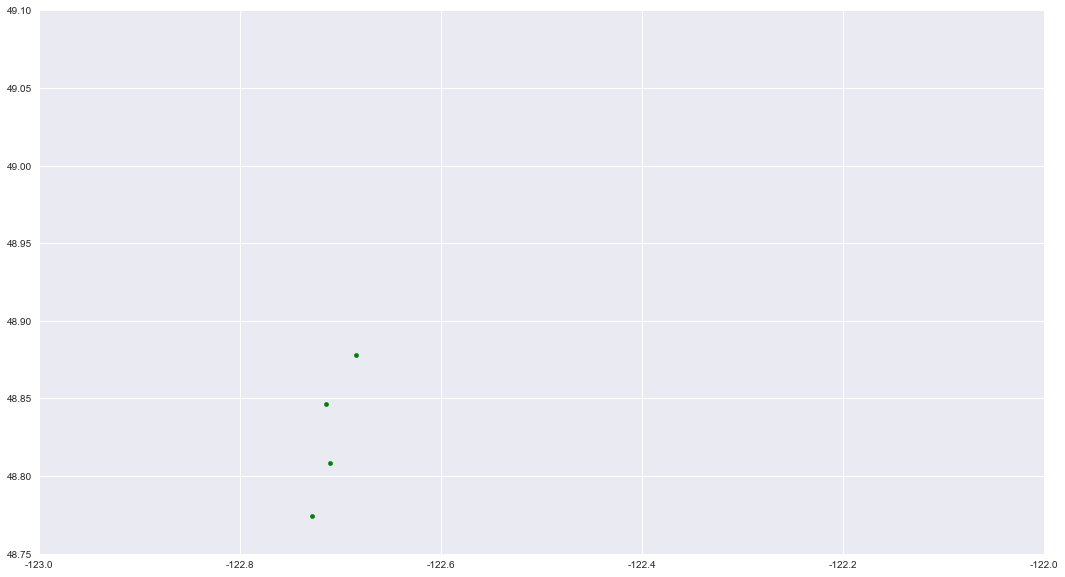

In [13]:
X=[-122.6849,-122.7147,-122.7103,-122.7288,-122.732,-122.7453]
Y=[48.8781,48.8466,48.8083,48.7746,48.7379,48.7032]
X=np.array(X)
Y=np.array(Y)
fig, ax = plt.subplots(1, 1, figsize=(18, 10))
ax.set_xlim(-123,-122)
ax.set_ylim(48.75,49.1)
ax.scatter(X, Y,c='g',s=20,cmap='coolwarm')